<a href="https://colab.research.google.com/github/monolixd/Ailearn/blob/main/stresscnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preritbhagat/stress-non-stress-images")

print("Path to dataset files:", path)

100%|██████████| 573M/573M [00:05<00:00, 107MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1


In [ ]:
import os

# ตรวจสอบว่า dataset มีอะไรบ้าง
!ls -l {path}


total 8
drwxr-xr-x 4 root root 4096 Feb  5 17:36 FINAL_TFEID
drwxr-xr-x 3 root root 4096 Feb  5 17:36 KDEF


In [ ]:
!find {path} -type d

/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/FINAL_TFEID
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/FINAL_TFEID/FINALTFEID_NONSTRESS
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/FINAL_TFEID/FINALTFEID_STRESS
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF/KDEF
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF/KDEF/Test
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF/KDEF/Test/Stress
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF/KDEF/Test/NoStress
/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1/KDEF/KDEF/Train
/root/.cache/kagglehub/

In [ ]:
import tensorflow as tf
import os

# กำหนด path ให้ตรงกับโครงสร้างที่เจอ
path = "/root/.cache/kagglehub/datasets/preritbhagat/stress-non-stress-images/versions/1"
train_dir = os.path.join(path, 'KDEF', 'KDEF', 'Train')
test_dir = os.path.join(path, 'KDEF', 'KDEF', 'Test')

# โหลด dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',  # ใช้ categorical เพราะมี 2 class
    image_size=(224, 224),
    batch_size=64,
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=64,
    shuffle=True
)

# ตรวจสอบข้อมูล
print("Train dataset:", train_dataset)
print("Test dataset:", test_dataset)


Found 4409 files belonging to 2 classes.
Found 1891 files belonging to 2 classes.
Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [ ]:
class_names = train_dataset.class_names
print("Class Names:", class_names)

Class Names: ['NoStress', 'Stress']


In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform

regularizer = l2(5e-4)
conv_initializer = HeUniform()

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,(5,5),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(4,4),
    tf.keras.layers.Conv2D(32,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation=None, kernel_initializer = conv_initializer, kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 53, 53, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 53, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 51, 51, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 51, 51, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 51, 51, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 19, 19, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 19, 19, 128)         │             5

 Total params: 611,618 (2.33 MB)

 Trainable params: 610,210 (2.33 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate = 1e-3, weight_decay = 1e-3)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy',patience=10,verbose=1,mode='max')
lr = ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', patience=3, factor=0.5, min_lr=1e-30, verbose = 2)
mc=ModelCheckpoint(filepath='best.keras',monitor='val_accuracy',save_best_only=True,mode='max')
callback=[es,lr,mc]

In [ ]:
history=model.fit(train_dataset,epochs=50,validation_data=test_dataset,callbacks=callback)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 46s 424ms/step - accuracy: 0.7183 - loss: 1.3022 - val_accuracy: 0.4469 - val_loss: 32.5588 - learning_rate: 0.0010
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - accuracy: 0.8458 - loss: 1.0204 - val_accuracy: 0.4474 - val_loss: 18.6990 - learning_rate: 0.0010
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.8971 - loss: 0.8642 - val_accuracy: 0.8160 - val_loss: 1.0113 - learning_rate: 0.0010
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 267ms/step - accuracy: 0.9015 - loss: 0.7943 - val_accuracy: 0.9085 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - accuracy: 0.9442 - loss: 0.6583 - val_accuracy: 0.8562 - val_loss: 0.8040 - learning_rate: 0.0010
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - accuracy: 0.9433 - loss: 0.6260 - val_accuracy: 0.9001 - val_loss: 0.6888 - learning_rate: 0.0010
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9579 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Loss => {test_loss}")
print(f"Test Accuracy => {test_accuracy}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9757 - loss: 0.2845
Test Loss => 0.30560198426246643
Test Accuracy => 0.9703860282897949


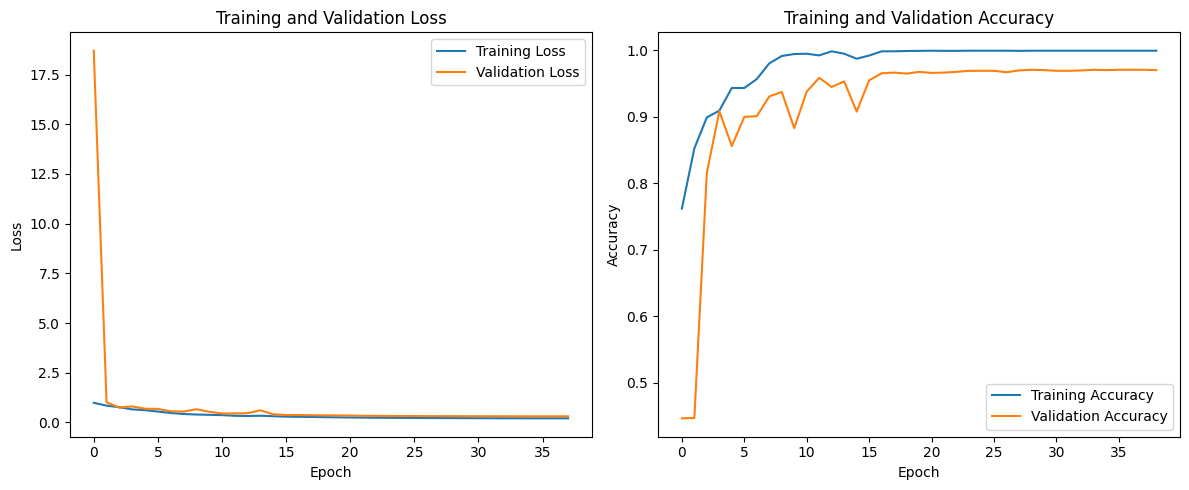

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'][1:], label='Training Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


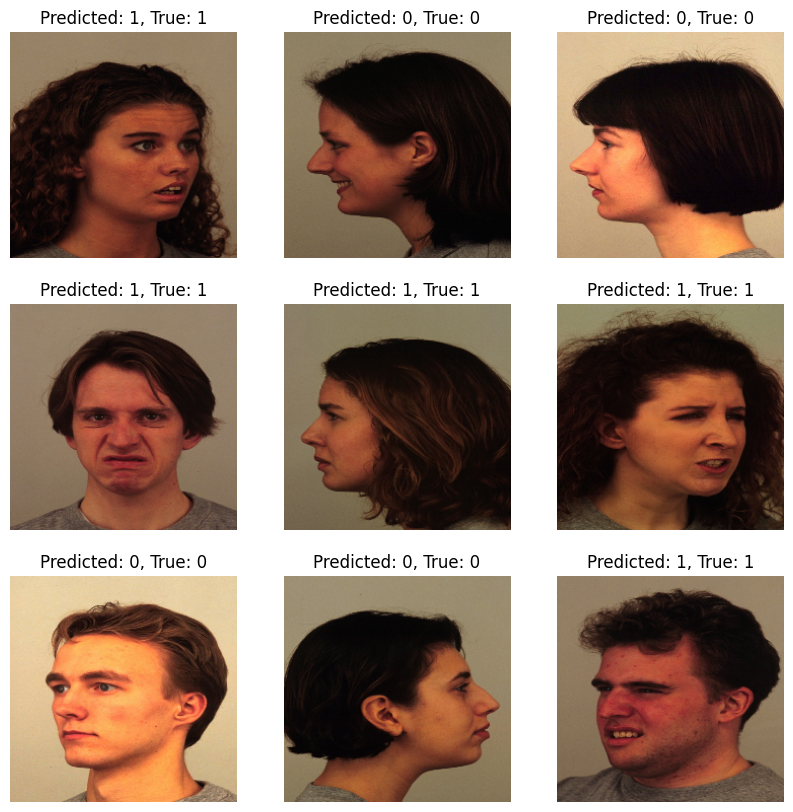

In [ ]:

import matplotlib.pyplot as plt
import numpy as np



# Load the best saved model
model.load_weights('best.keras')

# Get a batch of images and labels from the test dataset
for images, labels in test_dataset.take(1):  # Take only one batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Display some images with predicted and true labels
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {predicted_labels[i]}, True: {true_labels[i]}")
        plt.axis("off")
    plt.show()